In [6]:
from google.colab import drive #подключение гугл диска
drive.mount ('/content/drive/')
%cd /content/drive/MyDrive

Mounted at /content/drive/
/content/drive/MyDrive


In [7]:
import pandas as pd # Импортировал библиотеку pandas
import matplotlib.pyplot as plt # Импортировал библиотеку pyplot
import numpy as np # Импортировал библиотеку numpy




In [8]:
fileData=pd.read_csv('/content/drive/MyDrive/Airpollution.csv') #чтение датасет

In [ ]:
fileData.head(10) #выводим первые 10 строк на экран

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


In [ ]:
fileData.info() #выводим информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
fileData.dtypes #выводим информацию о типах данных

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

In [ ]:
fileData.shape #выводим информацию о количестве строк и колон

(23463, 12)

In [ ]:
fileData.isna().sum() #выводим количество пропущенных значений по колонкам

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [ ]:
fileData.duplicated() #проверяем дата сет на дубликаты данных

0        False
1        False
2        False
3        False
4        False
         ...  
23458    False
23459    False
23460    False
23461    False
23462    False
Length: 23463, dtype: bool

In [ ]:
# в датасетет доминирует тип данных  - "object". Есть одно пропущеное значение в колонке Сity и 427 в Country.

# **ПРЕДОБРАБОТКА И ВИЗУАЛИЗАЦИЯ дАННЫХ**

<Axes: >

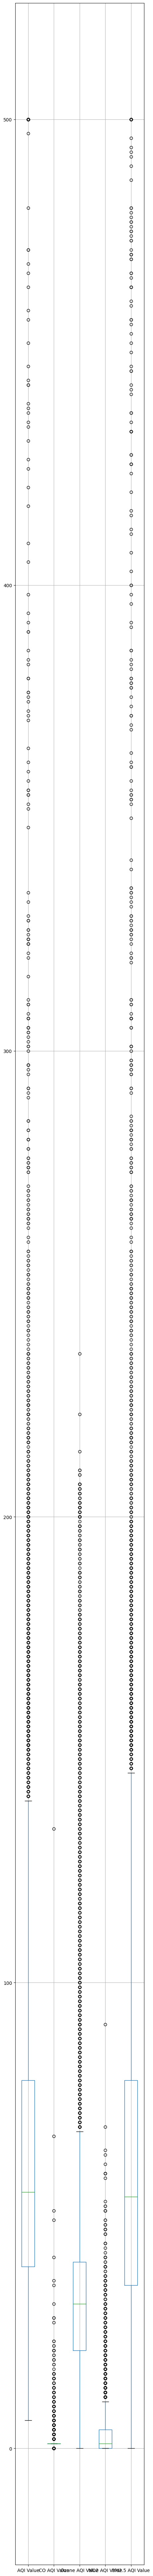

In [ ]:
plt.figure(figsize=(5,100)) #строим диагармму размаха для нашего датасета
fileData.boxplot()

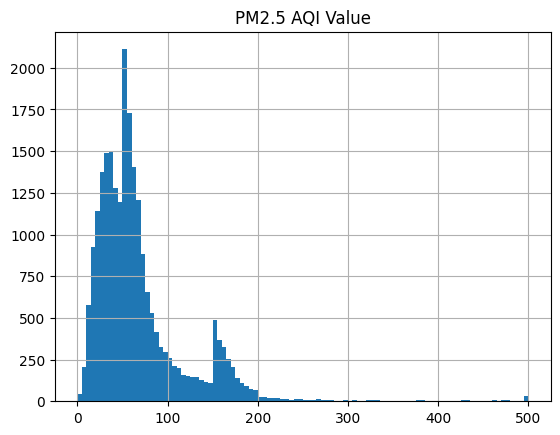

<Figure size 2000x1000 with 0 Axes>

In [ ]:
fileData.hist(column=values, bins=100) #построили гистаграмму размаха для нашего датасета
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
fileData.select_dtypes(include=['int64']) #Выводим все числовые данные (п.3)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6
...,...,...,...,...,...
23458,184,3,154,2,184
23459,50,1,20,5,50
23460,50,1,22,1,50
23461,71,1,44,2,71


In [ ]:
numeric_subset = fileData.select_dtypes(include=['int64']) #Проводим логарифмирование числовых данных (п.4)
for values in numeric_subset:
  numeric_subset[values].apply(lambda x:np.log(x))

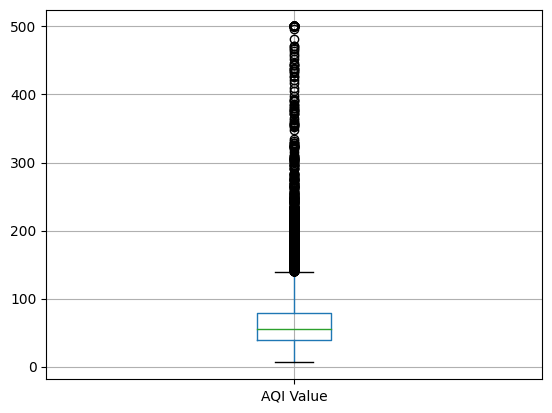

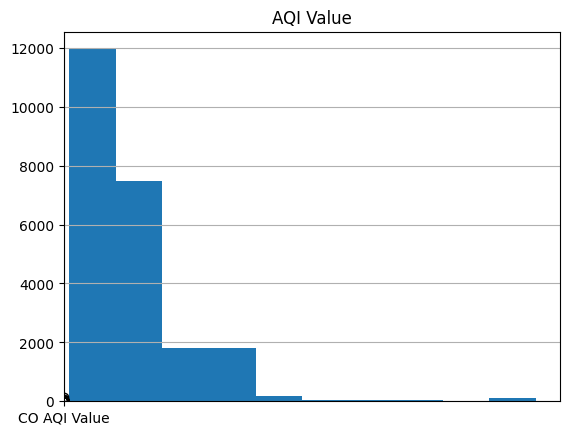

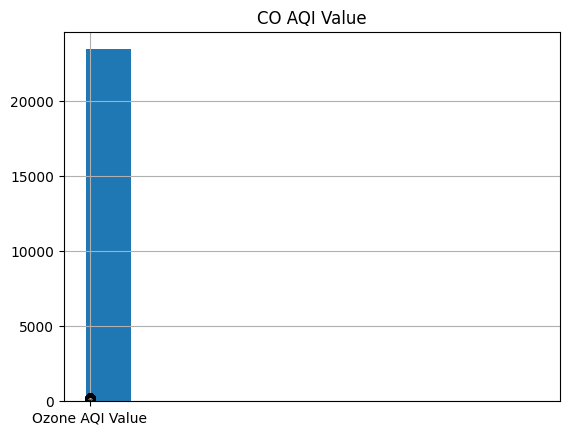

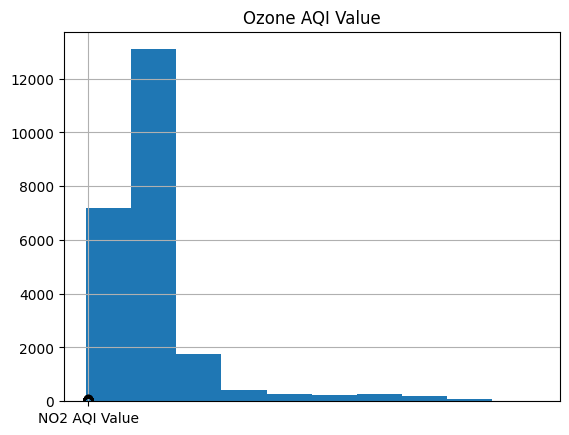

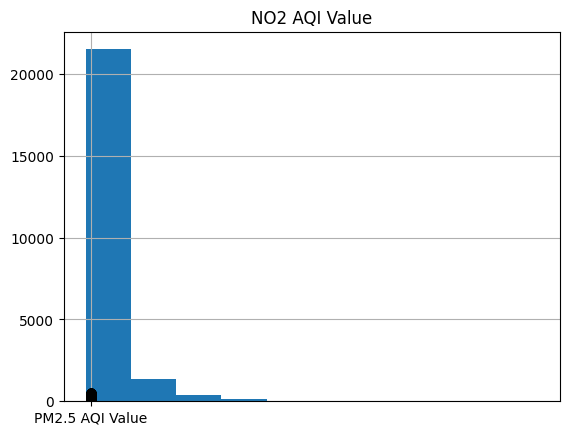

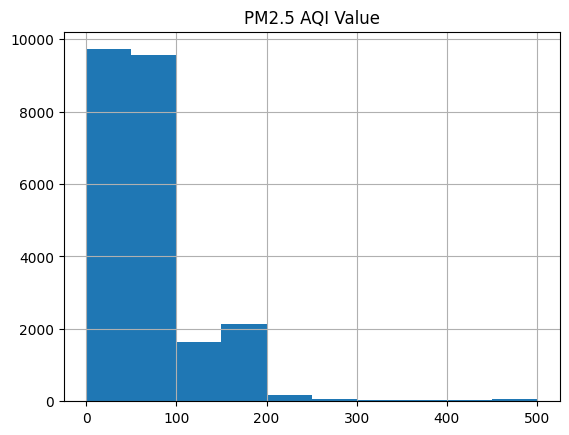

In [ ]:
for values in numeric_subset: #Строим диаграммы размаха и гистаграммы для отлагорифмированих значений
  numeric_subset.boxplot(column=values)
  numeric_subset.hist(column=values)

#**ДЕЛЕНИЕ НА ВЫБОРКИ МАСШТАБИРОВАНИЕ ПРИЗНАКОВ** (лАБ.РАБОТА №2)


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [38]:
#model = DecisionTreeClassifier();
#scaler = StandartScaler();

NameError: ignored

In [39]:
data = pd.read_csv('Airpollution.csv')

In [40]:
print (data)

                        Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
2                         Italy   Priolo Gargallo         66     Moderate   
3                        Poland         Przasnysz         34         Good   
4                        France          Punaauia         22         Good   
...                         ...               ...        ...          ...   
23458                     India      Gursahaiganj        184    Unhealthy   
23459                    France            Sceaux         50         Good   
23460                     India          Mormugao         50         Good   
23461  United States of America       Westerville         71     Moderate   
23462                  Malaysia            Marang         70     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \


In [12]:
features = data.drop('City', axis = 1); #удалить столбец City


In [ ]:
#print(features) эта команда для проверки удаленного столбца City

In [41]:
target = data['AQI Value']; #столбец AQI Value выделяем как ключевой

In [42]:
features = features.drop('AQI Value',  axis = 1); #удаляем столбец AQI Value

In [30]:
print(features)
print(features.dtypes)

                        Country  AQI Value AQI Category  CO AQI Value  \
0            Russian Federation         51     Moderate             1   
1                        Brazil         41         Good             1   
2                         Italy         66     Moderate             1   
3                        Poland         34         Good             1   
4                        France         22         Good             0   
...                         ...        ...          ...           ...   
23458                     India        184    Unhealthy             3   
23459                    France         50         Good             1   
23460                     India         50         Good             1   
23461  United States of America         71     Moderate             1   
23462                  Malaysia         70     Moderate             1   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0                Good               36         

In [43]:
data_train, data_test, AQIV_train, AQIV_test = train_test_split (features, target, test_size = 0.3, random_state = 20); # разбиваем на test и train выборки

In [44]:
print(data_train); #проверяем

          Country                    AQI Category  CO AQI Value  \
14441  Uzbekistan                        Moderate             1   
10568       Spain                            Good             1   
6457      Romania                            Good             1   
21684     Germany                        Moderate             1   
56         Latvia                            Good             1   
...           ...                             ...           ...   
3915       Angola                            Good             0   
14729         NaN                            Good             1   
23452    Pakistan  Unhealthy for Sensitive Groups             1   
4367    Indonesia                       Unhealthy             3   
15715       India                       Hazardous             2   

      CO AQI Category  Ozone AQI Value              Ozone AQI Category  \
14441            Good               39                            Good   
10568            Good               14         

In [45]:
scaler = StandardScaler()
data_train_fit = scaler.fit_transform(X = data_train.select_dtypes(exclude=['object']))
print(data_train_fit)

[[-0.2202195   0.12620274 -0.00701713  0.04379423]
 [-0.2202195  -0.75481542  0.57212559 -0.55593602]
 [-0.2202195   0.23192492 -0.58615985 -0.48324145]
 ...
 [-0.2202195   3.12166447 -0.58615985  0.29822525]
 [ 0.98621315 -0.47288961  1.15126831  1.58855398]
 [ 0.38299683  3.40359028 -0.00701713  5.11424093]]


In [46]:
print(AQIV_train)

14441     71
10568     38
6457      42
21684     59
56        44
        ... 
3915      20
14729     47
23452    124
4367     156
15715    394
Name: AQI Value, Length: 16424, dtype: int64


In [47]:
#scaler.fit(data_test.select_dtypes(exclude=['object']))
data_test_fit = scaler.transform(data_test.select_dtypes(exclude=['object']))

In [48]:
print(data_test_fit)

[[ 0.98621315 -1.03674122  1.73041102  1.04334466]
 [-0.2202195   0.44336928 -0.20006471 -0.301505  ]
 [-0.2202195   0.09096201 -0.39311228 -0.08342128]
 ...
 [-0.82343583 -0.08524162 -0.39311228 -0.6286306 ]
 [-0.2202195  -0.12048234 -0.58615985  1.64307491]
 [-0.2202195  -0.40240815 -0.58615985 -0.50141509]]


In [49]:
enc  = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [50]:
enc.fit(data_train.select_dtypes(exclude=['int64']))
data_train_OHE =  enc.transform(data_train.select_dtypes(exclude=['int64']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
print (data_train_OHE)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
enc.fit(data_test.select_dtypes(exclude=['int64']))
data_test_OHE = enc.transform(data_test.select_dtypes(exclude=['int64']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [60]:
print(data_test_OHE)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
data_train_res = pd.concat([pd.DataFrame(data_train_fit), pd.DataFrame(data_train_OHE)], axis = 1)
#обьединяем датафреймы с помощью concat

In [66]:
print(data_train_res)

            0         1         2         3    0    1    2    3    4    5    \
0     -0.220220  0.126203 -0.007017  0.043794  0.0  0.0  0.0  0.0  0.0  0.0   
1     -0.220220 -0.754815  0.572126 -0.555936  0.0  0.0  0.0  0.0  0.0  0.0   
2     -0.220220  0.231925 -0.586160 -0.483241  0.0  0.0  0.0  0.0  0.0  0.0   
3     -0.220220  0.020481 -0.200065 -0.174289  0.0  0.0  0.0  0.0  0.0  0.0   
4     -0.220220 -0.050001 -0.586160 -0.446894  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
16419 -0.823436 -0.543371 -0.586160 -1.028451  0.0  0.0  0.0  0.0  1.0  0.0   
16420 -0.220220  0.408129 -0.586160 -0.774020  0.0  0.0  0.0  0.0  0.0  0.0   
16421 -0.220220  3.121664 -0.586160  0.298225  0.0  0.0  0.0  0.0  0.0  0.0   
16422  0.986213 -0.472890  1.151268  1.588554  0.0  0.0  0.0  0.0  0.0  0.0   
16423  0.382997  3.403590 -0.007017  5.114241  0.0  0.0  0.0  0.0  0.0  0.0   

       ...  185  186  187  188  189  190  191  192 

In [67]:
data_test_res = pd.concat([pd.DataFrame(data_test_fit), pd.DataFrame(data_test_OHE)], axis = 1)
#обьединяем датафреймы с помощью concat

In [64]:
print(data_test_res)

           0         1         2         3    0    1    2    3    4    5    \
0     0.986213 -1.036741  1.730411  1.043345  0.0  0.0  0.0  0.0  0.0  0.0   
1    -0.220220  0.443369 -0.200065 -0.301505  0.0  0.0  0.0  0.0  0.0  0.0   
2    -0.220220  0.090962 -0.393112 -0.083421  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.986213  2.311128 -0.200065  1.879332  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.382997 -0.226205 -0.393112  0.698045  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
7034 -0.220220 -0.261445 -0.200065 -0.083421  0.0  0.0  0.0  0.0  0.0  0.0   
7035  0.382997  0.866258 -0.586160  0.189183  0.0  0.0  0.0  0.0  0.0  0.0   
7036 -0.823436 -0.085242 -0.393112 -0.628631  0.0  0.0  0.0  0.0  0.0  0.0   
7037 -0.220220 -0.120482 -0.586160  1.643075  0.0  0.0  0.0  0.0  0.0  0.0   
7038 -0.220220 -0.402408 -0.586160 -0.501415  0.0  0.0  0.0  0.0  0.0  0.0   

      ...  168  169  170  171  172  173  174  175  176  177  
0

In [ ]:
#видно что данные нормализовались, числовые значение теперь попадают в диапазон от -1 до 1
# булевы значения которые определяют признак преобрели значения 0 или 1 .